# How method chaining in pandas is and can be super effective

Method chaining is a programmatic style of invoking multiple method calls sequentially with each call performing an action on the same object and returning it. 

It eliminates the cognitive burden of naming variables at each intermediate step. 

Fluent Interface, a method of creating object-oriented API relies on method cascading (aka method chaining). 

Method chaining substantially increases the readability of the code. 

It is a top down approach.

## Readable and understandable code - chaining

I will always try to avoid the following two ways of writing code:

**1) MUTLIPLE OBJECT OPTION**

```
eat(
    
    slice(

        bake(
            
            put(
                pour(

                    mix(ingredients),

                    into=baking_form),

                    into=oven),

                time=30),
                
            pieces=6),
        1)
```

This first option is considered a “nested” option such that functions are nested 
within one another. Historically, this has been the traditional way of
integrating code; however, it becomes extremely difficult to read what 
exactly the code is doing and it also becomes easier to make mistakes when 
making updates to your code. Although not in violation of the DRY principle1, 
it definitely violates the basic principle of readability and clarity, 
which makes communication of your analysis more difficult. To make things
more readable, people often move to the following approach…

**2) NESTED OPTION**

```
    it = mix(ingredients)

    it = pour(it, into=baking_form)

    it = put(it, into=oven)

    it = bake(it, time=30)

    it = slice(it, pieces=6)

    it = eat(it, 1)
```

This second option helps in making the data wrangling steps more explicit 
and obvious. By sequencing 
multiple functions in this way you are likely saving multiple outputs 
that are not very informative to you or others; rather, the only reason 
you save them is to insert them into the next function to eventually get the
final output you desire. This inevitably creates unnecessary copies and wrecks 
havoc on properly managing your objects…basically it results in a global 
environment foxtrot charlie! 

** CHAINING METHOD (if and when python and pandas allows you)**

To provide the same readability (or even better), we can use chaining of methods to string 
these arguments together without unnecessary object creation…

The point of the chain is to help you write code in a way that is easier to read and understand. 
It is powerful tool for clearly expressing a sequence of multiple operations. 

```
    (ingredients

        .mix()

        .pour(into=baking_form)

        .put(into=oven)

        .bake(time=30)

        .slice(pieces=6)
    
        .ear(1)
    )
```



In [8]:
import pandas as pd
import janitor

In [22]:
well_exploration_original = pd.read_csv("https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/wellbore_exploration_all&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=82.102.27.246&CultureCode=en")

well_exploration = pd.read_csv("https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/wellbore_exploration_all&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=82.102.27.246&CultureCode=en")

In [23]:
# initial column name cleaning step
well_exploration.columns = (
    well_exploration.columns
        .str.replace("wlb", "")
        .str.replace("fld", "")
        .str.replace("fcl", "")
)
well_exploration = well_exploration.clean_names(case_type="snake")

Pandas doesn’t have a comprehensible list of methods to use in method chaining. But to make up for it, Pandas introduced Pipe function starting from version 0.16.2. Pipe enables user-defined methods in method chains.

With the introduction of pipe, you can almost write anything in a method chain which begets the question, How much chaining is too much?. This is an entirely subjective question and must be left to the discretion of the programmer. Most people find the sweet spot to be around 7 or 8 methods in a single chain. I don’t use any hard limits on the number of methods in a chain. Instead, I try to represent a single coherent thought in a single method chain.

Some of the critics of method chaining accuse it of increasing code readability at the cost of making debugging tricky, which is true. Imagine a chain that’s ten methods long that you are debugging after a month. The data frame structure or the column names have changed since then and now your chain starts throwing errors. Its impossible to now debug through the chain and see the changes it makes to the data frame as you move along the chain, albeit you can easily find which method call is breaking the code. This needs to be addressed before starting to use long method chains in production or in notebooks.

### How to track a changing of the dataframe shape along the chain?

Two things to note in this function are the:

* fn argument that can take in a lambda function  
* display function call

Lambda function lends flexibility and the display function call makes the display of data frames and plots pretty in a Jupyter lab or a notebook setting.

In [24]:
def csnap(df, fn=lambda x: x.shape, msg=None):
    """ Custom Help function to print things in method chaining.
        Returns back the df to further use in chaining.
    """
    if msg:
        print(msg)
    display(fn(df))
    return df

In [25]:
(well_exploration
    .pipe(csnap) # check the dataframe shape
    .filter(items = ["wellbore_name", "well", "drilling_operator", "water_depth", "total_depth"]) # select only 5 columns
    .pipe(csnap) # check the dataframe shape
    .query("water_depth >= 1000")
    .pipe(csnap) # check the dataframe shape
)

(1922, 87)

(1922, 5)

(31, 5)

wellbore_name       well                           drilling_operator  \
1393      6302/6-1   6302/6-1                           Statoil ASA (old)   
1394      6304/3-1   6304/3-1                            A/S Norske Shell   
1396      6305/4-1   6305/4-1                   Norsk Hydro Produksjon AS   
1397    6305/4-2 S   6305/4-2                            A/S Norske Shell   
1413      6403/6-1   6403/6-1                           Statoil ASA (old)   
1414     6403/10-1  6403/10-1                   Norsk Hydro Produksjon AS   
1415     6404/11-1  6404/11-1                           BP Amoco Norge AS   
1416      6405/7-1   6405/7-1                           Statoil ASA (old)   
1550    6504/5-1 S   6504/5-1                                Eni Norge AS   
1675    6603/5-1 S   6603/5-1                            A/S Norske Shell   
1676     6603/12-1  6603/12-1                            A/S Norske Shell   
1677      6604/2-1   6604/2-1                                 BG Norge AS   
1678      6604/5-1   6604/5-1                        Wintershall Norge AS   
1679      6604/6-1   6604/6-1                    Wintershall Dea Norge AS   
1680     6604/10-1  6604/10-1                            A/S Norske Shell   
1681      6605/1-1   6605/1-1                            StatoilHydro ASA   
1743     6704/12-1  6704/12-1                          Saga Petroleum ASA   
1744      6705/7-1   6705/7-1                             Repsol Norge AS   
1745     6705/10-1  6705/10-1                   StatoilHydro Petroleum AS   
1746      6706/6-1   6706/6-1  Esso Exploration and Production Norway A/S   
1747    6706/6-2 S   6706/6-2                        Wintershall Norge AS   
1748     6706/11-1  6706/11-1            Den norske stats oljeselskap a.s   
1749     6706/11-2  6706/11-2                        Statoil Petroleum AS   
1750     6706/12-1  6706/12-1                            StatoilHydro ASA   
1751     6706/12-2  6706/12-2                        Statoil Petroleum AS   
1752     6706/12-3  6706/12-3                        Statoil Petroleum AS   
1753     6707/10-1  6707/10-1                      BP Norway Limited U.A.   
1754   6707/10-2 A  6707/10-2                            StatoilHydro ASA   
1755   6707/10-2 S  6707/10-2                            StatoilHydro ASA   
1756   6707/10-3 S  6707/10-3               Centrica Resources (Norge) AS   
1759      7016/2-1   7016/2-1                                Eni Norge AS   

      water_depth  total_depth  
1393       1261.0       4234.0  
1394       1235.3       3642.0  
1396       1002.0       2975.0  
1397       1086.0       2985.0  
1413       1721.0       4120.0  
1414       1717.0       3400.0  
1415       1495.0       3650.0  
1416       1206.0       4300.0  
1550       1190.0       4193.0  
1675       1452.0       5254.0  
1676       1376.0       3830.0  
1677       1262.0       3551.0  
1678       1219.0       3858.0  
1679       1127.0          0.0  
1680       1354.0       3715.0  
1681       1157.0       3947.0  
1743       1352.0       4103.0  
1744       1404.0       3290.0  
1745       1335.0       3775.0  
1746       1298.0       3451.0  
1747       1214.0       3916.0  
1748       1238.0       4317.0  
1749       1272.0       2596.0  
1750       1262.0       3950.0  
1751       1312.0       2754.0  
1752       1287.0       3336.0  
1753       1274.0       5039.0  
1754       1248.0       4850.0  
1755       1248.0       3365.0  
1756       1421.0       4789.0  
1759       1366.0       4061.0

We can see how shape of the dataframe changed along the pipe in data processing pipeline:

```
(1921, 87)
(1921, 5)
(30, 5)
```

## pipe `seaborn`'s scatterplot into chain of methods

(1922, 6)

(632, 6)

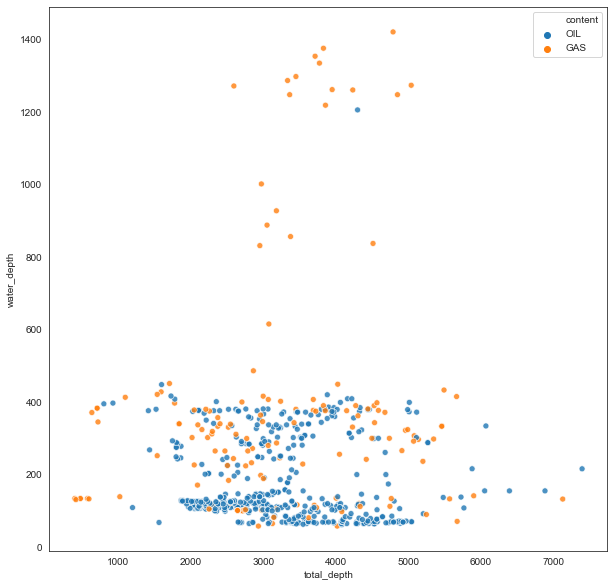

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
plt.figure(figsize=(10,10))

(well_exploration
    .filter(items=["wellbore_name", "purpose", "content", "drilling_operator", "total_depth", "water_depth"])
    .pipe(csnap) # check dataframe shape
    .query("content in ['OIL', 'GAS']")
    .pipe(csnap) # check dataframe shape
    .pipe((sns.scatterplot, 'data'),
            x='total_depth', 
            y='water_depth', 
            hue='content',
            alpha=0.8)
 );